## **Part 0: Importing from Python Libraries**


---

Run the cell directly below before doing anything else. This will import all of the functions that we will use today.

In [1]:
#upgrade !pip
!pip install --upgrade pip

  Using cached pip-23.0.1-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 21.0
    Uninstalling pip-21.0:
      Successfully uninstalled pip-21.0


In [14]:
!apt install curl

E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?


In [6]:
#!pip install --upgrade scikit-learn
#!pip install --upgrade imbalanced-learn
#!pip install --upgrade qiskit_nature
#!pip install --user qiskit_optimization
!pip install --upgrade --user pyscf

#!pip install qulacs 
#!pip install pyscf 
#!pip install --user openfermion 
#!pip install --user openfermionpyscf
#!pip install -e quri-parts/qulacs/quri_parts
#git clone https://github.com/QunaSys/quri-parts.git
#!pip install -r quri-parts/requirements-local.txt
#!pip install -e home/jovyan/quantum-challenge/2022-fall/lab-1/VQE/quri-parts/requirement-local.txt
#/opt/conda/lib/python3.8/site-packages
import sys
sys.path
#!pip install "quri-parts[qulacs]"
#!pip install --upgrade pip
#!pip install python 
#!sudo apt update
!python --version
#!pip install -e quri-parts
#!pip install git+https://github.com/QunaSys/quri-parts.git
#!pip install orquestra-qulacs@git+https://github.com/zapatacomputing/orquestra-qulacs.git
#!pip install pyenv@git+https://github.com/pyenv/pyenv.git



  Using cached pyscf-2.1.1.tar.gz (8.5 MB)
  Running setup.py clean for pyscf
Failed to build pyscf
    Running setup.py install for pyscf: started
    Running setup.py install for pyscf: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\arhuoje\AppData\Local\Continuum\miniconda3\envs\hugoPy37\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\arhuoje\\AppData\\Local\\Temp\\pip-install-71f9otul\\pyscf\\setup.py'"'"'; __file__='"'"'C:\\Users\\arhuoje\\AppData\\Local\\Temp\\pip-install-71f9otul\\pyscf\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\arhuoje\AppData\Local\Temp\pip-wheel-y21znunh'
       cwd: C:\Users\arhuoje\AppData\Local\Temp\pip-install-71f9otul\pyscf\
  Complete output (35 lines):
  running bdist_wheel
  running build
  running build_ext
  Configuring extensions
  C:\Program Files\CMake\bin\cmake.exe -SC:\Users\arhuoje\AppData\Local\Temp\pip-install-71f9otul\pyscf\pyscf\lib -Bbuild\temp.win-amd64-3.7\Release
  -- Building for: Visual Studio 15 2017
  -

Python 3.7.7


In [1]:
# Non-qiskit imports
import math
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


# General Qiskit and VQE imports
from qiskit import Aer, IBMQ
from qiskit import QuantumCircuit
from qiskit.visualization import visualize_transition
from qiskit.algorithms import VQE
from qiskit.circuit.library import EfficientSU2
from qiskit.algorithms.optimizers import SPSA, COBYLA
from qiskit.algorithms import NumPyMinimumEigensolver
from qiskit.utils import QuantumInstance
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit_optimization.converters import QuadraticProgramToQubo

# Knapsack and Electronic Structure Problem imports
from qiskit_optimization.applications import Knapsack
from qiskit_nature.algorithms import (GroundStateEigensolver,
                                     NumPyMinimumEigensolverFactory)
from qiskit_nature.drivers import Molecule
from qiskit_nature.drivers.second_quantization import (
    ElectronicStructureMoleculeDriver, ElectronicStructureDriverType)
from qiskit_nature.problems.second_quantization import ElectronicStructureProblem
from qiskit_nature.converters.second_quantization import QubitConverter
from qiskit_nature.mappers.second_quantization import ParityMapper
from qiskit_nature.second_q.mappers import JordanWignerMapper
from qiskit.opflow import TwoQubitReduction


print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
provider = IBMQ.load_account()

In [3]:
print(provider)

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>


In [4]:
provider=IBMQ.get_provider(hub='qhack-event', group='main', project='level-1')

In [5]:
print(provider)

<AccountProvider for IBMQ(hub='qhack-event', group='main', project='level-1')>


In [6]:
provider.backends(operational=True,simulator=False)

[<IBMQBackend('ibmq_jakarta') from IBMQ(hub='qhack-event', group='main', project='level-1')>,
 <IBMQBackend('ibm_nairobi') from IBMQ(hub='qhack-event', group='main', project='level-1')>]

In [37]:
backend=provider.get_backend('ibmq_jakarta')


In [7]:
backend=provider.get_backend('ibm_nairobi')

In [8]:
print("\n Selected ackend:",backend.name())


 Selected ackend: ibm_nairobi


## **Finding the Structure of a Molecule**
---

In this section, we will use VQE to determine the structure of the hydrogen molecule $BeH_2$.

### Setting Up the Problem

The problem of finding the electronic structure of $BeH_2$ with a distance of 1.3 Angstroms between the atoms.

In [2]:
dist = 2.4566439619345806
molecule = Molecule(
   #geometry=[
   #          ["H", [0.0, 0.0, 0]],
   #          ["H", [0.0, 0.0, dist]]],
    #         ],
   geometry=[
             ["Be", [0.0, 0.0, 0.0]],
             ["H", [0.0, 0.0, -dist]],
             ["H", [0.0, 0.0, dist]],
        ], 
   #geometry=[["BE", [0.0, 0.0, 0.0]],
   #           ["H", [0.0, 0.0, dist]],
   #           ["H", [0.0, 0.0, dist]]],
   
    multiplicity=1,charge=0)

driver = ElectronicStructureMoleculeDriver(
    molecule=molecule,
    basis="sto3g",
    driver_type=ElectronicStructureDriverType.PYSCF)

problem = ElectronicStructureProblem(driver)

second_q_ops = problem.second_q_ops()  # Get 2nd Quant OP
num_spin_orbitals = problem.num_spin_orbitals

num_particles = problem.num_particles
print(num_spin_orbitals)

print(num_particles)
mapper = ParityMapper()  # Set Mapper

hamiltonian = second_q_ops['ElectronicEnergy']#second_q_ops[0]  # Set Hamiltonian
#fermionic_op = problem.hamiltonian.second_q_op()
# Do two qubit reduction
#
converter = QubitConverter(JordanWignerMapper(), z2symmetry_reduction="auto",two_qubit_reduction=True)

qubit_op = converter.convert(hamiltonian, sector_locator=problem.symmetry_sector_locator)
#converter = QubitConverter(mapper,two_qubit_reduction=True)
reducer = TwoQubitReduction(num_particles)
print(qubit_op)

#qubit_op = converter.convert(hamiltonian)
qubit_op = reducer.convert(qubit_op)
#print(qubit_op)
print(qubit_op.num_qubits)

MissingOptionalLibraryError: "The 'pyscf' library is required to use 'PySCFDriver'.  See https://pyscf.org/install.html."

### **Exercise #2: Setting Up VQE**

Next, we will set up VQE. Specifically, we will create:
* The tunable circuit using `EfficientSU2` with the correct number of qubits and 1 repetition.
* A classical optimizer that uses the `COBYLA` algorithm provided by Qiskit.
* The VQE solver combining all of these components.

In [7]:
tunable_circuit = EfficientSU2(num_qubits = qubit_op.num_qubits, reps=1)# COMPLETE THIS LINE

optimizer = COBYLA(maxiter=500)

method = VQE(ansatz = tunable_circuit, optimizer = optimizer, quantum_instance = Aer.get_backend('qasm_simulator'))
#method = VQE(ansatz = tunable_circuit, optimizer = optimizer, quantum_instance = provider.get_backend('ibm_nairobi'))

### **Exercise #3: Visualize the Circuit**

Before solving the problem, let's visualize the tunable circuit we will be using.

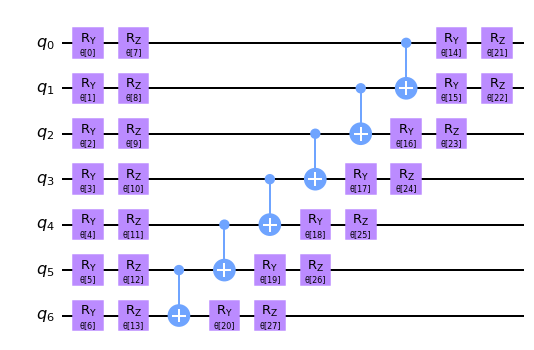

In [8]:
#var_form.decompose().draw()# COMPLETE THIS LINE
tunable_circuit.decompose().draw()# COMPLETE THIS LINE

### **Exercise #4: Using VQE to Solve the Problem**

Finally, it's time to find the energy of this structure and print the results.

In [9]:
calc = GroundStateEigensolver(converter, method)
result = calc.solve(problem)

print("Total energy = ", result.total_energies)

capi_return is NULL
Call-back cb_calcfc_in__cobyla__user__routines failed.


KeyboardInterrupt: 

### **Exercise #5: Verify the Solution**

Unlike in Part 2, it's difficult for us to determine if this solution is correct just by looking at it. So, let's use an exact solver that is guaranteed to give us the correct answer.

In [50]:
method = NumPyMinimumEigensolver()

calc = GroundStateEigensolver(converter, method)
exact_result = calc.solve(problem)
print("Total energy = ", exact_result.total_energies)

Total energy =  [-15.59504708]


**Run the code below to exactly calculate the error in VQE's answer.**

In [9]:
print("Error % = ", (exact_result.total_energies - result.total_energies)/(exact_result.total_energies)*100) 

Error % =  [2.00159806]


### **Followup Activities**

1. Can you tweak your tunable circuit so that your total energy is closer to the exact solution? Consider looking at the official [EfficientSU2 documentation](https://qiskit.org/documentation/stubs/qiskit.circuit.library.EfficientSU2.html) to see possible ways to tweak the circuit.
2. What is the least number of repetitions that still gives you a good match with the exact solution?
3. What happens when there are more repetitions? Do you notice errors?
4. Change the distance between the atoms in Exercise #1. Can you find the distance that minimizes the total energy?

## **Part 4: Finding the Optimal Distance**
---

In the lab, we showed you how we can find the energy for one distance between the hydrogen atoms. Now, let's find the energies for many distances, and in the process, find the lowest possible energy. The distance at which we get the lowest energy corresponds to the ground state bond length of the hydrogen molecule!

In [4]:
tunable_circuit = EfficientSU2(num_qubits = 6, reps = 1, entanglement='full')
optimizer = COBYLA(maxiter=100)
method = VQE(ansatz = tunable_circuit, optimizer = optimizer, quantum_instance = Aer.get_backend('statevector_simulator'))


exact_energies = []
vqe_energies = []
distances = [0.1,0.3,0.5,0.7,0.9,1.1,1.3,1.5,1.7,1.9,2.1,2.3,2.5]


for i in range(len(distances)):
    
    # Set up the problem for thsi distance
    dist = distances[i]
    molecule = Molecule(
        geometry=[
            ["Be", [0.0, 0.0, 0.0]],
            ["H", [0.0, 0.0, -dist]],
            ["H", [0.0, 0.0, dist]],
        ], 
        multiplicity=1,charge=0)

    driver = ElectronicStructureMoleculeDriver(
        molecule=molecule,
        basis="sto3g",
        driver_type=ElectronicStructureDriverType.PYSCF)

    problem = ElectronicStructureProblem(driver)

    second_q_ops = problem.second_q_ops()
    num_spin_orbitals = problem.num_spin_orbitals
    num_particles = problem.num_particles

    mapper = ParityMapper()
    hamiltonian = second_q_ops['ElectronicEnergy']

    converter = QubitConverter(mapper,two_qubit_reduction=True)
    reducer = TwoQubitReduction(num_particles)
    qubit_op = converter.convert(hamiltonian)
    qubit_op = reducer.convert(qubit_op)

    
    # Solve exactly
    method = NumPyMinimumEigensolver()
    exact_calc = GroundStateEigensolver(converter, method)
    exact_result = exact_calc.solve(problem)
    exact_energies.append(exact_result.total_energies)
    
    # Solve with VQE
    vqe_calc = GroundStateEigensolver(converter, method)
    vqe_result = vqe_calc.solve(problem)
    vqe_energies.append(vqe_result.total_energies)
    
    
    print("Completed", i+1, "out of", str(len(distances)), "calculations")

Completed 1 out of 13 calculations
Completed 2 out of 13 calculations
Completed 3 out of 13 calculations
Completed 4 out of 13 calculations
Completed 5 out of 13 calculations
Completed 6 out of 13 calculations
Completed 7 out of 13 calculations
Completed 8 out of 13 calculations
Completed 9 out of 13 calculations
Completed 10 out of 13 calculations
Completed 11 out of 13 calculations
Completed 12 out of 13 calculations
Completed 13 out of 13 calculations


**Run the code below to plot the energy as a function of distance for the Exact Solver and VQE.**

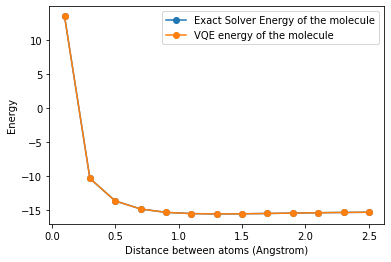

In [5]:
plt.plot(distances, exact_energies, distances, vqe_energies, marker = "o")
plt.xlabel('Distance between atoms (Angstrom)')
plt.ylabel('Energy')
plt.legend(['Exact Solver Energy of the molecule','VQE energy of the molecule'])
plt.show()

In [3]:
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.drivers import PySCFDriver

dist = 2.4566439619345806
driver = PySCFDriver(
    #atom="H 0 0 0; H 0 0 0.735",
    
    atom="Be .0 .0 .0; H .0 .0 -" + str(dist) + "; H .0 .0 " + str(dist),
    basis="sto3g",
    charge=0,
    spin=0,
    unit=DistanceUnit.ANGSTROM,
)

MissingOptionalLibraryError: "The 'pyscf' library is required to use 'PySCFDriver'.  See https://pyscf.org/install.html."

In [60]:
problem = driver.run()
print(problem)

In [61]:
hamiltonian = problem.hamiltonian

coefficients = hamiltonian.electronic_integrals
print(coefficients.alpha)

Polynomial Tensor
 "+-":
[[-8.66954238e+00  2.28567908e-01 -2.49098012e-16  3.33336995e-18
   4.25002966e-18  1.90834709e-01 -1.98008762e-16]
 [ 2.28567908e-01 -2.48894934e+00  2.33065783e-17  9.19888824e-17
   1.27055880e-16 -1.60576952e-01  2.50355537e-16]
 [-2.56241590e-16 -2.92328599e-17 -2.45356180e+00  3.24117436e-18
   6.24877415e-17 -2.49899164e-16 -2.73403030e-01]
 [ 3.33336995e-18  9.19888824e-17  3.24117436e-18 -2.30853571e+00
   2.00315934e-16 -1.02195374e-16 -2.34814747e-16]
 [ 4.25002966e-18  1.27055880e-16  6.24877415e-17  1.79326301e-16
  -2.30853571e+00 -1.39226987e-16 -9.09773373e-17]
 [ 1.90834709e-01 -1.60576952e-01 -1.51054896e-16 -1.02195374e-16
  -1.39226987e-16 -1.91691510e+00 -1.01973433e-15]
 [-2.49293479e-16  2.30299694e-16 -2.73403030e-01 -2.34814747e-16
  -9.09773373e-17 -5.83712716e-16 -1.78472394e+00]]
 "++--":
[[[[ 2.27146253e+00 -2.01144450e-01  2.03088283e-16 ... -3.24139308e-18
    -1.78265404e-01  2.12298136e-16]
   [-2.01144450e-01  2.73189600e-02 -

In [62]:
second_q_op = hamiltonian.second_q_op()
print(second_q_op)

Fermionic Operator
number spin orbitals=14, number terms=1938
  1.1357312655296228 * ( +_0 +_0 -_0 -_0 )
+ -0.10057222514914167 * ( +_0 +_0 -_0 -_1 )
+ -0.0891327020344949 * ( +_0 +_0 -_0 -_5 )
+ -0.10057222514914176 * ( +_0 +_0 -_1 -_0 )
+ 0.013659480010805636 * ( +_0 +_0 -_1 -_1 )
+ 0.012446899700556851 * ( +_0 +_0 -_1 -_5 )
+ 0.003100762005974748 * ( +_0 +_0 -_2 -_2 )
+ 0.0057435314389268554 * ( +_0 +_0 -_2 -_6 )
+ 0.00788394898884579 * ( +_0 +_0 -_3 -_3 )
+ 0.007883948988845787 * ( +_0 +_0 -_4 -_4 )
+ -0.08913270203449512 * ( +_0 +_0 -_5 -_0 )
+ 0.012446899700556877 * ( +_0 +_0 -_5 -_1 )
+ 0.011476295069530509 * ( +_0 +_0 -_5 -_5 )
+ 0.005743531438926856 * ( +_0 +_0 -_6 -_2 )
+ 0.01088523616148286 * ( +_0 +_0 -_6 -_6 )
+ -0.10057222514914171 * ( +_0 +_1 -_0 -_0 )
+ 0.01365948001080564 * ( +_0 +_1 -_0 -_1 )
+ 0.012446899700556858 * ( +_0 +_1 -_0 -_5 )
+ 0.24638113707663817 * ( +_0 +_1 -_1 -_0 )
+ -0.0034622848851606188 * ( +_0 +_1 -_1 -_1 )
+ -0.0034472911511427467 * ( +_0 +_1 -_1 -

In [63]:
problem.molecule

MoleculeInfo(symbols=['Be', 'H', 'H'], coords=[(0.0, 0.0, 0.0), (0.0, 0.0, -2.4566439619345806), (0.0, 0.0, 2.4566439619345806)], multiplicity=1, charge=0, units=<DistanceUnit.BOHR: 'Bohr'>, masses=[9, 1, 1])

In [64]:
problem.reference_energy

-15.561278032308028

In [65]:
from qiskit_nature.second_q.algorithms import GroundStateEigensolver, NumPyMinimumEigensolverFactory
from qiskit_nature.second_q.mappers import JordanWignerMapper, QubitConverter

solver = GroundStateEigensolver(
    QubitConverter(JordanWignerMapper()),
    NumPyMinimumEigensolverFactory(),
)

In [66]:
result = solver.solve(problem)
print(result)

=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -19.055051921565
  - computed part:      -19.055051921565
~ Nuclear repulsion energy (Hartree): 3.460004840631
> Total ground state energy (Hartree): -15.595047080934
 
=== MEASURED OBSERVABLES ===
 
  0:  # Particles: 6.000 S: 0.000 S^2: 0.000 M: 0.000
 
=== DIPOLE MOMENTS ===
 
~ Nuclear dipole moment (a.u.): [0.0  0.0  0.0]
 
  0: 
  * Electronic dipole moment (a.u.): [0.0  0.0  0.0]
    - computed part:      [0.0  0.0  0.0]
  > Dipole moment (a.u.): [0.0  0.0  0.0]  Total: 0.0
                 (debye): [0.0  0.0  0.0]  Total: 0.0
 


In [7]:
#!pip install --upgrade setuptools wheel
!pip install --user openfermionpyscf

  Using cached openfermionpyscf-0.5-py3-none-any.whl (16 kB)
  Using cached pyscf-2.1.1.tar.gz (8.5 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for pyscf
Failed to build pyscf
  Running setup.py install for pyscf: started
  Running setup.py install for pyscf: finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [34 lines of output]
  running bdist_wheel
  running build
  running build_ext
  cmake -SC:\Users\arhuoje\AppData\Local\Temp\pip-install-qyobjnfa\pyscf_a6b817a3d66744db81c7f0c7d11fe6a8\pyscf\lib -Bbuild\temp.win-amd64-cpython-39\Release
  -- Building for: Visual Studio 15 2017
  -- Selecting Windows SDK version 10.0.17763.0 to target Windows 10.0.19044.
  -- The C compiler identification is MSVC 19.16.27042.0
  -- The CXX compiler identification is MSVC 19.16.27042.0
  -- Detecting C compiler ABI info
  -- Detecting C compiler ABI info - done
  -- Check for working C compiler: C:/Program Files (x86)/Microsoft Visual Studio/2017/BuildTools/VC/Tools/MSVC/14.16.27023/bin/Hostx86/x86/cl.exe - skipped
  -- Detecting C compile features
  -- Detecting C compile features - done
  -- Detecting CXX compiler ABI info
  -- Detecting CXX compiler ABI info - done
  -- Check for workin

In [1]:
import qulacs
#from openfermion.transforms import get_fermion_operator, jordan_wigner
from openfermion import MolecularData
from openfermion import get_sparse_operator, jordan_wigner
from openfermion import get_ground_state
import openfermionpyscf
#from openfermionpyscf import run_pyscf
#from scipy.optimize import minimize
from pyscf import fci
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'openfermionpyscf'

In [2]:
basis = "sto-3g"
multiplicity = 1
charge = 0
distance  = 0.977
geometry = [["Be", [0,0,0]],["H", [0,0,-distance]],["H", [0,0,distance]]]
description  = "tmp"
molecule = MolecularData(geometry, basis, multiplicity, charge, description)
molecule = run_pyscf(molecule,run_scf=1,run_fci=1)
n_qubit = molecule.n_qubits
print(n_qubit)
n_electron = molecule.n_electrons
fermionic_hamiltonian = get_fermion_operator(molecule.get_molecular_hamiltonian())
jw_hamiltonian = jordan_wigner(fermionic_hamiltonian)

Traceback (most recent call last):
  Input In [2] in <cell line: 8>
    molecule = run_pyscf(molecule,run_scf=1,run_fci=1)
NameError: name 'run_pyscf' is not defined

Use %tb to get the full traceback.


In [21]:
from quri_parts.core.operator.grouping import bitwise_pauli_grouping
pauli_sets = bitwise_pauli_grouping(jw_hamiltonian)
print(pauli_sets)

Traceback (most recent call last):
  Input In [21] in <cell line: 1>
    from quri_parts.core.operator.grouping import bitwise_pauli_grouping
ModuleNotFoundError: No module named 'quri_parts'

Use %tb to get the full traceback.


In [12]:
from qulacs import Observable
from qulacs.observable import create_observable_from_openfermion_text
qulacs_hamiltonian = create_observable_from_openfermion_text(str(jw_hamiltonian))

In [13]:
from qulacs import QuantumState, QuantumCircuit
from qulacs.gate import CZ, RY, RZ, merge

depth = n_qubit

In [14]:
def he_ansatz_circuit(n_qubit, depth, theta_list):
    """he_ansatz_circuit
    Returns hardware efficient ansatz circuit.

    Args:
        n_qubit (:class:`int`):
            the number of qubit used (equivalent to the number of fermionic modes)
        depth (:class:`int`):
            depth of the circuit.
        theta_list (:class:`numpy.ndarray`):
            rotation angles.
    Returns:
        :class:`qulacs.QuantumCircuit`
    """
    circuit = QuantumCircuit(n_qubit)
    for d in range(depth):
        for i in range(n_qubit):
            circuit.add_gate(merge(RY(i, theta_list[2*i+2*n_qubit*d]), RZ(i, theta_list[2*i+1+2*n_qubit*d])))
        for i in range(n_qubit//2):
            circuit.add_gate(CZ(2*i, 2*i+1))
        for i in range(n_qubit//2-1):
            circuit.add_gate(CZ(2*i+1, 2*i+2))
    for i in range(n_qubit):
        circuit.add_gate(merge(RY(i, theta_list[2*i+2*n_qubit*depth]), RZ(i, theta_list[2*i+1+2*n_qubit*depth])))

    return circuit

In [16]:
def cost(theta_list):
    state = QuantumState(n_qubit) #Prepare |00000>
    circuit = he_ansatz_circuit(n_qubit, depth, theta_list) #Construct quantum circuit
    circuit.update_quantum_state(state) #Operate quantum circuit on state
    return qulacs_hamiltonian.get_expectation_value(state) #Calculate expectation value of Hamiltonian

In [17]:
cost_history = []
init_theta_list = np.random.random(2*n_qubit*(depth+1))*1e-1
cost_history.append(cost(init_theta_list))
method = "BFGS"
options = {"disp": True, "maxiter": 50, "gtol": 1e-6}
opt = minimize(cost, init_theta_list,
               method=method,
               callback=lambda x: cost_history.append(cost(x)))

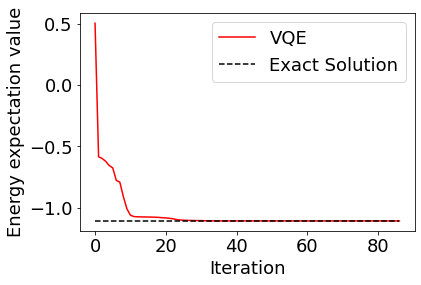

In [18]:
plt.rcParams["font.size"] = 18
plt.plot(cost_history, color="red", label="VQE")
plt.plot(range(len(cost_history)), [molecule.fci_energy]*len(cost_history), linestyle="dashed", color="black", label="Exact Solution")
plt.xlabel("Iteration")
plt.ylabel("Energy expectation value")
plt.legend()
plt.show()